# Assignment 4

## Statistical Inference

1.Past experience indicates that because of low morale  a company losses 20 hours a year per employee due to lateness and absenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.  The HR department implemented a new rewards system to increase employee morale and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 16.3.

a.Could you confirm that the new rewards system was effective with a 90% confidence

b.An HR subject matter expert would be very happy if the program could reduce absenteeism by 20%, i.e. to 16 hours.  Given the current sampling parameters, what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it (fail to reject the null)?

c.Repeat part a) and b) with an α = 95% CI.

d.Based on the answers in c), is the sampling method good enough to discriminate a reduction from 20 to 16 hours if I use a confidence of 95%?

e.What should be the sample size if you want β to be 5%, i.e. power of the test 95.

Note:  this problem is very similar to Problem 11.1 seen in class.  However watch out for the direction of the tails.  CDF start from zero in most software's, you may need to take the complement (1-cdf%)  of the cdf depending on how you frame the problem in your equations and or code.

<b>a.Could you confirm that the new rewards system was effective with a 90% confidence?</b><br/>
<br/>
Our population is all of the employees in the company. Our population parameter is the mean number of hours per employee lost each year due to absenteeism (annualized absenteeism). We were given that the standard deviation for the entire population is 6 hours and we can assume normal distribution.<br/>
<br/>
$\mu=20$<br/>
$\sigma=6$<br/>
<br/>
For the rewards system to be considered effective, we would expect $\mu$ to be lower once the rewards system was in place. Thus our two competing hypotheses are:<br/>
<br/>
$H_{0}: \mu=20$<br/>
$H_{A}: \mu<20$<br/>
<br/>
Once the rewards system was in-place, a random sample of 20 employees was collected and annualized absenteeism was 16.3<br/>
<br/>
$n = 20$<br/>
$\bar{x}$ = 16.3<br/>
<br/>
We have to consider the uncertainty associated with our point estimate, the sample mean ($\bar{x}$). We can use the central limit theorem and the normal distribution because the standard deviation of the population is known. Since we have been given the standard deviation for the population, calculating standard error<br/>(SE$_{\bar{x}}$) for the sample mean is simple:<br/>
<br/>
$SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$<br/>
$= \frac{6}{\sqrt{20}}$<br/>
$= 1.34$<br/>
<br/>
To determine the confidence interval for any confidence level:<br/>
<br/>
$ \bar{x} \pm z^*SE_{\bar{x}}$, where $z^*$ corresponds to the confidence level selected.<br/>
For a 90% confidence interval, $z^*$ = 1.28<br/>
<br/>
($16.3 - 1.28 \times 1.34, 16.3 + 1.28 \times 1.34)$<br/>
$=(14.58,18.02)$<br/>
<br/>
We are 90% confident that the average number of hours an employee was absent once the rewards system was put in-place is between 14.58 hours and 18.02 hours. This is obviously lower than annualized absenteeism prior to the rewards system ($\mu=20$), so we can say with 90% confidence that the null hypothesis is implausible and can be rejected, thus the rewards system was effective.

<b>b. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20%, i.e. to 16 hours. Given the current sampling parameters, what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it (fail to reject the null)?</b><br/>
<br/>
We already know that our population mean is 20 with a standard deviation of 6. As stated, we are assuming that our sample mean is 16 hours and our sample size is 20. If our confidence level ($\alpha$) is 90%, that means our significance level is 0.1:<br/>
<br/>
$\mu=20$ (this is our null value)<br/>
$\sigma=6$<br/>
<br/>
$n=20$<br/>
$\bar{x}=16$<br/>
<br/>
$\alpha=0.1$<br/>
<br/>
$SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{6}{\sqrt{20}} = 1.34$<br/>
<br/>
We want to consider the data under the scenario that the null hypothesis is true. Let's look at our sample distribution:<br/>

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

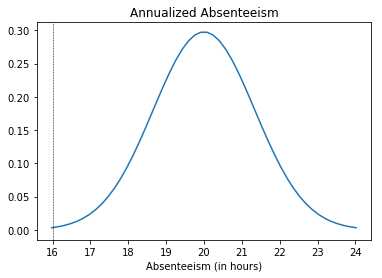

In [2]:
mean = 20
stdev = 1.34
xbar = 16
x = np.linspace(mean - 3*stdev, mean + 3*stdev, 50)
plt.plot(x,st.norm.pdf(x, mean, stdev))
plt.xlabel('Absenteeism (in hours)')
plt.title('Annualized Absenteeism')
plt.axvline(xbar, color='k', linestyle='dashed', linewidth=0.5)
fill_area = x[np.where(x<xbar)]
plt.fill_between(fill_area,st.norm.pdf(fill_area, mean, stdev),0)
plt.show()

The p-value is the left-tail area of the above normal distribution, which appears to be very small. To calculate the area underneath the curve, we first need to calculate the z-score of the sample mean:<br/>
<br/>
$Z = \frac{\bar{x} - null value}{SE_{\bar{x}}} = \frac{16 - 20}{1.34} = -2.99$<br/>
<br/>
Using the normal probability table, we learn that the area underneath the curve is .0014, thus p = .0014<br/>
<br/>
We evaluate the hypotheses by comparing the p-value (0.0014) to the significance level (0.1). The p-value is a lot lower, so we can reject the null hypothesis. The p-value tells us that the probability of failing to reject the null hypothesis when the new rewards system reduces absenteeism to 16 hours is 0.0014.

<b>c. Repeat part a) and b) with an α = 95% CI.</b><br/>
<br/>
To determine the confidence interval for any confidence level:<br/>
<br/>
$ \bar{x} \pm z^*SE_{\bar{x}}$, where $z^*$ corresponds to the confidence level selected.<br/>
Assuming the parameter and sampling values from question 1a., and a 95% confidence interval, $z^*$ = 1.96<br/>
<br/>
($16.3 - 1.96 \times 1.34, 16.3 + 1.96 \times 1.34)$<br/>
$=(13.67,18.93)$<br/>
<br/>
For a 95% confidence interval, the significance level is 0.05: $\alpha = 0.05$<br/>
<br/>
From question 1b. we know that the p-score is .0014, which is still much smaller than our significance level of 0.05, so we can now be 95% confident in our rejection of the null hypothesis.

<b>d. Based on the answers in c), is the sampling method good enough to discriminate a reduction from 20 to 16 hours if I use a confidence of 95%?</b><br/>
<br/>
Yes, because 16 falls within our 95% confidence interval and our p-value is much smaller than our significance level, which favours the alternate hypothesis (the rewards system improved absenteeism) over the null hypothesis (the rewards system did not impact absenteeism).

<b>e. What should be the sample size if you want β to be 5%, i.e. power of the test 95.</b><br/>
<br/>
So we are determining how large a sample we need to be 95% certain we are correctly rejecting $H_0$.<br/>
<br/>
We start by identifying the Z-score that would give us a lower-tail of 95%: it would be about 1.64.<br/>
<br/>
Additionally, the rejection region always extends 1.96 x SE from the center of the null distribution for $\alpha = 0.05$. This allows us to calculate the target distance between the center of the null and alternative distributions in terms of the standard error. The distributions are centred around their mean:<br/>
<br/>
1.64 x SE + 1.96 x SE = 3.6 x SE<br/>
(20-16) = 3.6 $\times$ SE<br/>
4 = 3.6 $\times \sqrt{\frac{6^2}{n} + \frac{6^2}{n}}$<br/>
n = $\frac{3.6^2}{4^2} \times (6^2 + 6^2)$<br/>
n = 58.32<br/>
<br/>
Thus the sample size should be 59 if you want $\beta$ to be 5%.

## Chi-Square Goodnees of fit:

Write python code for textbook section 6.3.5:
<ul>
<li>Calculate the expected values based on the geometric distribution with a probability of 53.2%</li>
<li>Compare the expected vs. the observed values from the textbook using the Chi-Square distribution</li>
<li>Reach a conclusion</li>
<li>Explain what is the business impact of your conclusion</li>
</ul>

(the steps are given in the textbook, however it is a very conceptual exercise that can be used with any known distribution)<br/>
<br/>
To find each expected count, we identify the probability of of waiting D days, based on the geometric model
$P(D) = (1 - 0.532)^{D-1}(0.532)$ and multiply by the total number of streaks, 2948.<br/>
<br/>

In [3]:
def P(D):
    return ((1-0.532)**(D - 1))*0.532

observed = np.array([1532, 760, 338, 194, 74, 33, 17])
probs = P(np.array([1, 2, 3, 4, 5, 6, 7]))
expected = np.round(probs * 2948.0).astype(int)
expected

array([1568,  734,  344,  161,   75,   35,   16])

In [4]:
# The last element should represent the case where D >= 7, not just D=7, so we need to adjust its value
expected[6] = 2948 - np.sum(expected[:6])
expected

array([1568,  734,  344,  161,   75,   35,   31])

In [5]:
# Validate that we have exactly 2948 values accounted for in our expected values
expected.sum()

2948

In [6]:
# The expected values based on the geometric distribution with a probability of 53.2% are:
expected

array([1568,  734,  344,  161,   75,   35,   31])

In [7]:
chisq, p = st.chisquare(observed, expected)

In [8]:
chisq

15.066337549525954

In [9]:
p

0.019746985983350823

The chi-squared test statistic, $\chi^2=15.07$ and the p-value = 0.0197, which is sufficient evidence to reject the null hypothesis that the stock market being up or down on a specific day is independent from all other days.<br/>
<br/>
The business impact of this conclusion is that if the dependency (or dependencies) between trading days can be identified, stock traders could potentially use that information to trade more effectively and improve profitability.